**Import Libraries to train the model**

In [8]:
import os
from PIL import Image
import numpy as np
from keras.models import model_from_json
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator
from imageio import imread, imsave
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model



**Show some sample images of dataset**

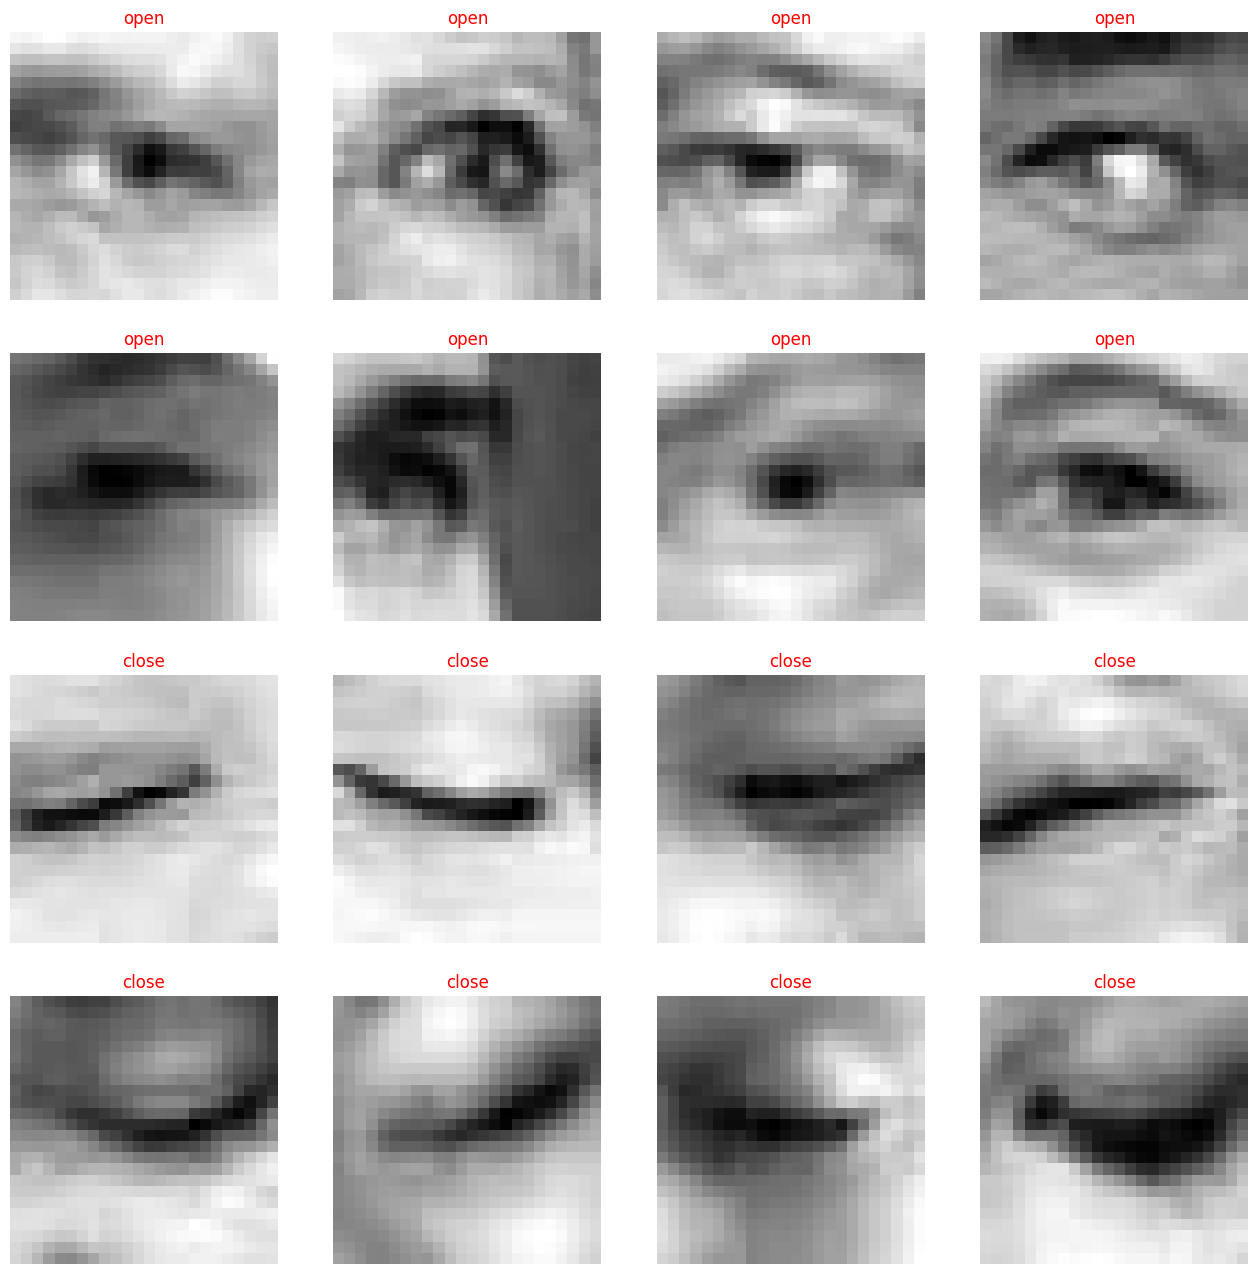

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define dataset path and subdirectories
train_dir = 'dataset/dataset/train'
open_dir = os.path.join(train_dir, 'open')
close_dir = os.path.join(train_dir, 'closed')

# Get list of image filenames from both directories
open_fnames = os.listdir(open_dir)
close_fnames = os.listdir(close_dir)

# Select a batch of images to display (you can adjust this range as needed)
pic_index = 100
open_pix = [os.path.join(open_dir, fname) for fname in open_fnames[pic_index-8:pic_index]]
close_pix = [os.path.join(close_dir, fname) for fname in close_fnames[pic_index-8:pic_index]]

# Set up matplotlib figure and size it to fit the images
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# Plot the images from both open and close folders
for i, img_path in enumerate(open_pix + close_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Hide axes
    
    # Display the image in grayscale
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray')
    
    # Label the image as "open" or "close" above it
    label = 'open' if img_path in open_pix else 'close'
    sp.set_title(label, fontsize=12, color='red')  # Title with "open" or "close" label

plt.show()


**✅ As there is only train and val so Now needed test set:**
* train folder will have 90% images

* test will have 10% images (Folder Created)

* val remains untouched

Safe to run again and again ✅

No function — just simple, clear top-level code ✅

In [2]:
import os
import random
import shutil

# Basic Setup
base_path = 'dataset/dataset'
train_path = os.path.join(base_path, 'train')
val_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')

classes = ['open', 'closed']
split_ratio = 0.1  # 10%

# Step 1: Create test folders if not exist
for cls in classes:
    os.makedirs(os.path.join(test_path, cls), exist_ok=True)

print("[INFO] Moving back existing test images to train...")

# Step 2: Move back all images from test to train
for cls in classes:
    test_cls_path = os.path.join(test_path, cls)
    train_cls_path = os.path.join(train_path, cls)

    if os.path.exists(test_cls_path):
        test_images = os.listdir(test_cls_path)
        for img in test_images:
            shutil.move(os.path.join(test_cls_path, img), os.path.join(train_cls_path, img))

print("[INFO] All test images moved back to train.")

# Step 3: Split 10% from train into test
print("[INFO] Splitting 10% images from train into test set...")

for cls in classes:
    train_cls_path = os.path.join(train_path, cls)
    test_cls_path = os.path.join(test_path, cls)

    all_images = os.listdir(train_cls_path)
    random.shuffle(all_images)

    num_test = max(1, int(len(all_images) * split_ratio))  # ensure at least 1 image

    test_images = all_images[:num_test]

    for img in test_images:
        shutil.move(os.path.join(train_cls_path, img), os.path.join(test_cls_path, img))

    print(f"[INFO] Moved {len(test_images)} images from {cls}/train to {cls}/test.")

print("[INFO] Splitting complete.")


[INFO] Moving back existing test images to train...
[INFO] All test images moved back to train.
[INFO] Splitting 10% images from train into test set...
[INFO] Moved 192 images from open/train to open/test.
[INFO] Moved 186 images from closed/train to closed/test.
[INFO] Splitting complete.


**Pre-process dataset**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 24

# Data Augmentation setup
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Train Data Generator
train_generator = train_datagen.flow_from_directory(
    directory="dataset/dataset/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)

# Validation Data Generator
val_generator = val_datagen.flow_from_directory(
    directory="dataset/dataset/val",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)

# Test Data Generator
test_generator = test_datagen.flow_from_directory(
    directory="dataset/dataset/test", 
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=32,
    class_mode="binary",
    shuffle=False,  # usually shuffle=False for test
    seed=42
)


2025-04-27 16:34:59.085895: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 16:34:59.265266: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-27 16:34:59.265323: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-27 16:34:59.265386: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-27 16:34:59.292770: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 16:34:59.295484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Found 3401 images belonging to 2 classes.
Found 1067 images belonging to 2 classes.
Found 378 images belonging to 2 classes.


**Model Buiding**

In [6]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = val_generator.n // val_generator.batch_size

print('[LOG] Initialize Neural Network')

model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


[LOG] Initialize Neural Network


2025-04-27 16:50:27.484612: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


**Model Summary**

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 16)          880       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 32)          0

**Training**

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('eye_status_classifier.h5', save_best_only=True)

# Train
history = model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=val_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=20,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/20
106/106 [==============================] - ETA: 0s - loss: 0.6278 - accuracy: 0.6394

/home/love/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


106/106 [==============================] - 174s 2s/step - loss: 0.6278 - accuracy: 0.6394 - val_loss: 0.5295 - val_accuracy: 0.7386
Epoch 2/20
106/106 [==============================] - 20s 188ms/step - loss: 0.4428 - accuracy: 0.8002 - val_loss: 0.4246 - val_accuracy: 0.8021
Epoch 3/20
106/106 [==============================] - 17s 157ms/step - loss: 0.3017 - accuracy: 0.8747 - val_loss: 0.2834 - val_accuracy: 0.8816
Epoch 4/20
106/106 [==============================] - 21s 193ms/step - loss: 0.2450 - accuracy: 0.9077 - val_loss: 0.2549 - val_accuracy: 0.9034
Epoch 5/20
106/106 [==============================] - 18s 167ms/step - loss: 0.2087 - accuracy: 0.9187 - val_loss: 0.2230 - val_accuracy: 0.9167
Epoch 6/20
106/106 [==============================] - 19s 182ms/step - loss: 0.2014 - accuracy: 0.9258 - val_loss: 0.1996 - val_accuracy: 0.9242
Epoch 7/20
106/106 [==============================] - 20s 186ms/step - loss: 0.1951 - accuracy: 0.9258 - val_loss: 0.2063 - val_accuracy: 0.925

**Modek Loss Plot**

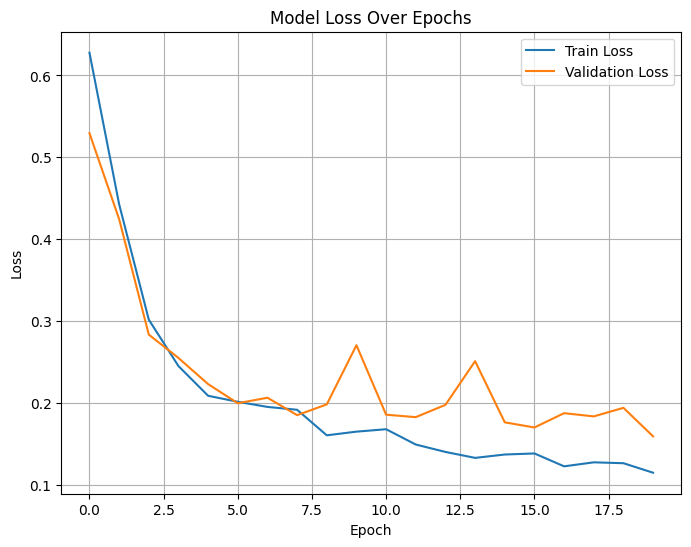

In [9]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


**Model Accuracy Plot**

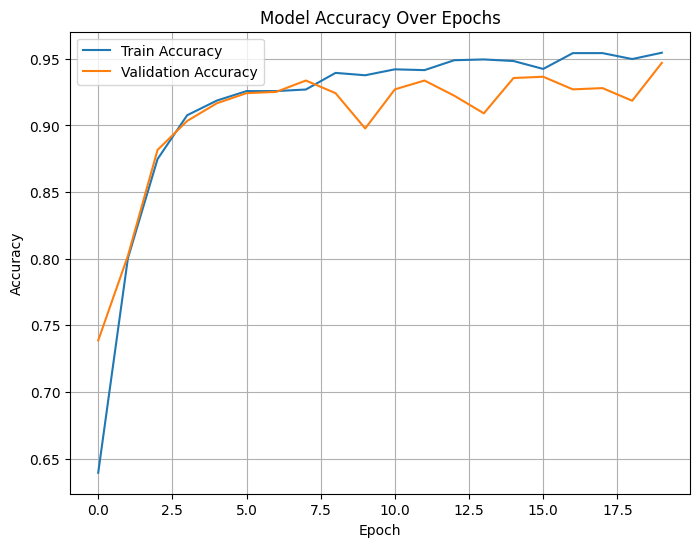

In [10]:
# Plot the training and validation accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**Confusion Matrix for Test Data**

11/11 [==============================] - 4s 337ms/step
Classification Report:
              precision    recall  f1-score   support

      closed       0.97      0.91      0.94       186
        open       0.91      0.97      0.94       166

    accuracy                           0.94       352
   macro avg       0.94      0.94      0.94       352
weighted avg       0.94      0.94      0.94       352



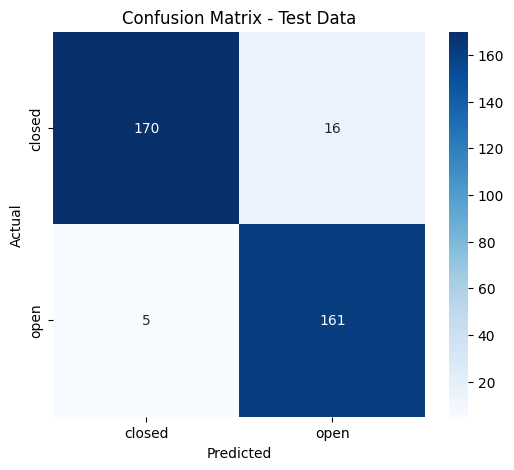

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels on the test set
test_generator.reset()
Y_pred = model.predict(test_generator, steps=test_generator.n // test_generator.batch_size, verbose=1)
y_pred = np.where(Y_pred > 0.5, 1, 0)  # threshold 0.5

# True labels
y_true = test_generator.classes[:len(y_pred)]  # Match size

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Classification report
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=['closed', 'open']))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['closed', 'open'], yticklabels=['closed', 'open'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()


**Prediction**

1/1 [==============================] - 0s 55ms/step
Prediction: closed


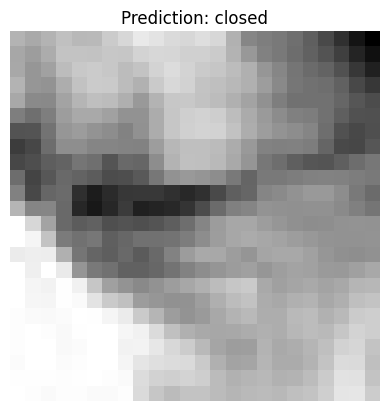

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set image size
IMG_SIZE = 24  # This is the size your model is expecting

# 👇 Set your image path here
image_path = 'dataset/dataset/train/closed/closed_eye_0002.jpg_face_2_L.jpg'

# Load the image
img = Image.open(image_path)

# Convert the image to grayscale
img = img.convert('L')

# Resize image to IMG_SIZE x IMG_SIZE
img = img.resize((IMG_SIZE, IMG_SIZE))

# Convert to numpy array and normalize
img_array = np.array(img).astype('float32') / 255.0

# Ensure the image has the correct shape for the model (1, IMG_SIZE, IMG_SIZE, 1)
img_array = img_array.reshape(1, IMG_SIZE, IMG_SIZE, 1)

# Predict
prediction = model.predict(img_array)

# Classification based on prediction confidence
if prediction < 0.1:
    prediction_label = 'closed'
elif prediction > 0.90:
    prediction_label = 'open'
else:
    prediction_label = 'idk'

print('Prediction:', prediction_label)

# Show the image along with the prediction
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {prediction_label}")
plt.axis('off')
plt.show()
